In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/california-state-jobs/CalCareersData.csv', parse_dates=['Publish_Date', ]).drop(columns=['URLs'])
df.head()

,Job_Listing,Working_Title,Job Control,Salary_Range,Work_Type/Schedule,Department,Location,Publish_Date,Filing_Deadline
0,ACCOUNTANT I (SPECIALIST),Accountant I (Specialist),400163,$3600.00 - $4506.00,Permanent Fulltime,Department of Consumer Affairs,Sacramento County,2023-11-09,11/21/2023
1,ACCOUNTANT I (SPECIALIST),Accountant 1 (Specialist),379743,$3600.00 - $4506.00,Permanent Fulltime,Department of Rehabilitation,Sacramento County,2023-11-09,11/19/2023
2,ACCOUNTANT TRAINEE,Accountant Trainee – Telework Hybrid,402653,$4065.00 - $4992.00,Permanent Fulltime,Department of Motor Vehicles,Sacramento County,2023-11-09,11/28/2023
3,ACCOUNTANT TRAINEE,Accountant Trainee,402217,$4065.00 - $4847.00,Permanent Fulltime,Department of Corrections & Rehabilitation,Sacramento County,2023-11-09,11/24/2023
4,ACCOUNTANT TRAINEE,Accountant Trainee (PC 3141),366727,$4065.00 - $4992.00,Permanent Fulltime,Department of Education,Sacramento County,2023-11-09,11/20/2023


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Job_Listing         9413 non-null   object        
 1   Working_Title       9413 non-null   object        
 2   Job Control         9413 non-null   int64         
 3   Salary_Range        9413 non-null   object        
 4   Work_Type/Schedule  9413 non-null   object        
 5   Department          9413 non-null   object        
 6   Location            9413 non-null   object        
 7   Publish_Date        9413 non-null   datetime64[ns]
 8   Filing_Deadline     9413 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 662.0+ KB


In [3]:
df.nunique()

Job_Listing            944
Working_Title         4682
Job Control           8968
Salary_Range          1112
Work_Type/Schedule      10
Department             177
Location                60
Publish_Date           217
Filing_Deadline        112
dtype: int64

In [4]:
from plotly.express import bar
for column in ['Work_Type/Schedule', 'Location']:
    bar(data_frame=df[column].value_counts().to_frame().reset_index(), x=column, y='count', log_y=True).show()

(-0.5, 1199.5, 1199.5, -0.5)

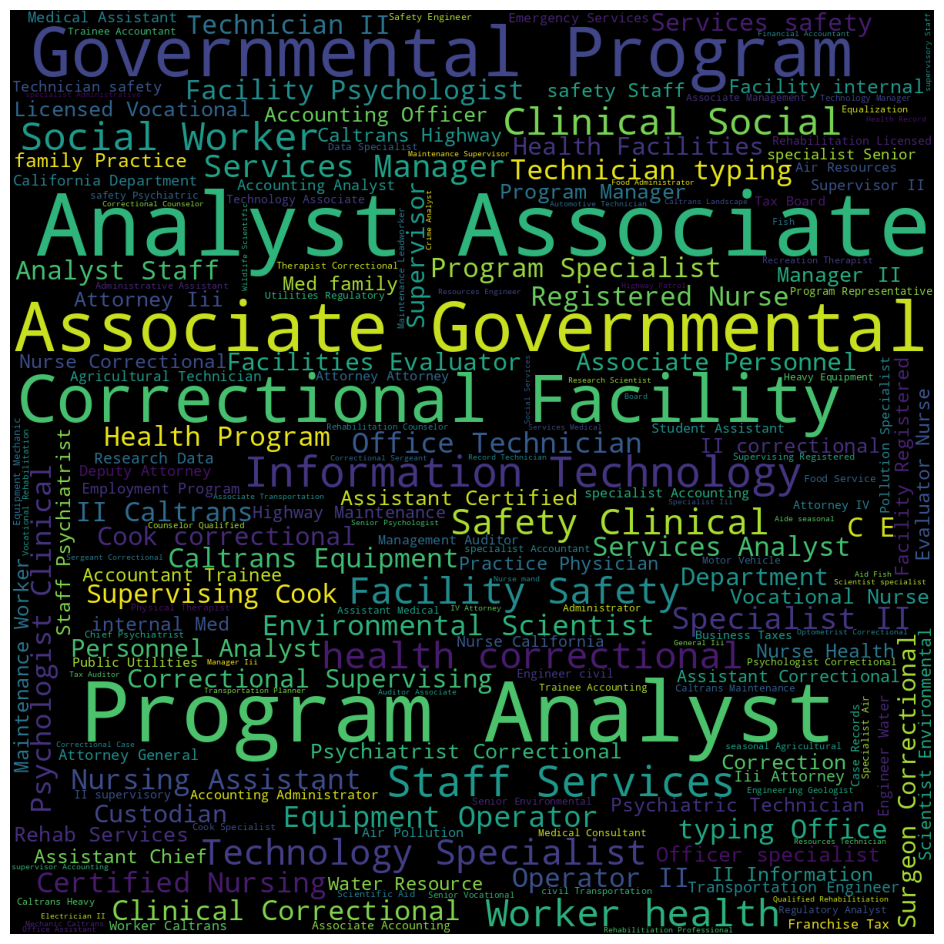

In [5]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
from wordcloud import STOPWORDS

subplots(figsize=(12, 12))
text = ' '.join(df['Job_Listing'].values)
text = ' '.join(item.capitalize() if len(item) > 2 else item for item in text.split())
stopwords = STOPWORDS.union(set('s'))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=stopwords ).generate(text=text), )
axis('off')